<a href="https://colab.research.google.com/github/nanangyudi/2020pds_d/blob/main/SofieYuningrumSafitri_205150409111017(Proyek_Akhir).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Deskripsi Tujuan Bisnis**

Pengolahan data ini bertujuan untuk memprediksi perfomance karyawan




> **Analisa Pendekatan**

Dalam analisis ini peneliti menggunakan metode EDA (Exploratory Data Analysis). EDA merupakan metode eksplorasi data dengan menggunakan teknik aritmatika sederhana dan teknik grafis dalam meringkas data pengamatan.






> **Pengumpulan Data**

Dalam tahap pengumpulan data disini menggunakan dataset yang diambil dari https://www.kaggle.com/rhuebner/human-resources-data-set yang berjudul Human Resources Data Set, dengan ukuran file sebesar 75.06 KB



> **Pemahaman Terhadap Data Yang Telah Dikumpulkan**

Dataset yang berjudul Human Resources Data Set ini berisikan data karyawan pada sebuah perusahaan. Data ini terdiri dari Employee Name, Employee ID, Married ID, Marital Status, Gender ID, EmpStatus ID, Department ID, PerfScore, From Diversity JobFair ID, Salary, TermD, Position ID, Position, State, ZIP, DOB, Sex, Marital Description, CitizenDesc, HispanicLatino, RaceDesc, DateofHire, TermReason, EmploymentStatus, Department, ManagerName, ManagerID, RecruitmentSource, PerformanceScore, EngagementSurvey, EmpSatisfaction, SpecialProjectsCount, LastPerformanceReview_Date, DaysLateLast30, Absences



> **Eksplorasi Data**

Library yang digunakan dalam explorasi data adalah pandas, Matpolib, dan Seaborn



### **Eksplorasi Data**



**Import library yang akan digunakan menjalankan project ini**

In [ ]:
import pandas as pd 
pd.set_option('display.max_columns', None)
import numpy as np 
import re

**Membaca data dari github dan simpan pada variable bernama data**

In [ ]:
url = 'https://raw.githubusercontent.com/sofiesafitri/data/main/HRDataset_v14.csv'
data = pd.read_csv(url, error_bad_lines=False)
print("read dataset in dataframe!")


read dataset in dataframe!


**Menampilkan data dari file**

In [ ]:
data.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,0,19,Production Technician I,MA,1844,05/22/77,F,Single,US Citizen,No,White,1/9/2012,NaN,N/A-StillEmployed,Active,Production,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,0,24,Software Engineer,MA,2110,05/24/79,F,Single,US Citizen,No,White,11/10/2014,NaN,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,0,19,Production Technician I,MA,2199,02/18/83,M,Widowed,US Citizen,No,White,9/30/2013,NaN,N/A-StillEmployed,Active,Production,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,0,19,Production Technician I,MA,1902,02/11/70,F,Single,US Citizen,No,Black or African American,7/6/2009,NaN,N/A-StillEmployed,Active,Production,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,0,14,IT Support,MA,1886,01/07/88,M,Divorced,US Citizen,No,White,1/5/2015,NaN,N/A-StillEmployed,Active,IT/IS,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


**Mendeskipsikan data dari file. Terdiri dari count,mean,std,min,25%,50%,75%, dan max**

In [ ]:
data.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


**Menampilkan dimensi data**

In [ ]:
dimensi = data.shape
print(f'Dimensi data sejumlah {dimensi[0]} data, dan terdiri dari {dimensi[1]} kolom')

Dimensi data sejumlah 311 data, dan terdiri dari 36 kolom


**Menampilkan jumlah karyawan dalam grafik berdasarkan jenis kelamin**

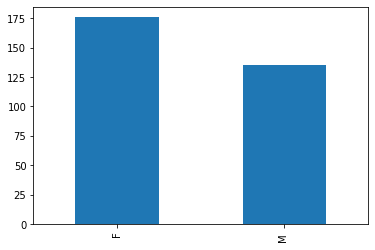

In [ ]:
data['Sex'].value_counts() 
data['Sex'].value_counts().plot(kind='bar')

Pada grafik ditampilkan jumlah perempuan(Female) lebih banyak daripada jumlah laki-laki (Male)


**Menampilkan grafik pendapatan karyawan**

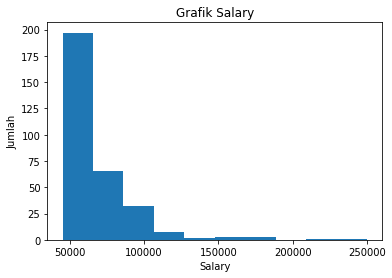

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,1,1)

#Variable
ax.hist(data['Salary'],bins = 10)
#Labels and Title
plt.title('Grafik Salary')
plt.xlabel('Salary')
plt.ylabel('Jumlah')
plt.show()

Pada grafik diatas diperoleh data berupa gaji karyawan kebanyakan sejumlah $50000 US Dollar

**Tabel Pengelompokkan posisi pekerjaan dengan bagaimana cara direkrut**

In [ ]:
dt= data.groupby(['Position','RecruitmentSource'])
dt.size()

Position                  RecruitmentSource 
Accountant I              Diversity Job Fair    1
                          Indeed                1
                          Website               1
Administrative Assistant  Diversity Job Fair    1
                          Indeed                1
                                               ..
Sr. Accountant            Other                 1
Sr. DBA                   Indeed                1
                          LinkedIn              1
Sr. Network Engineer      Employee Referral     3
                          LinkedIn              2
Length: 80, dtype: int64

Tabel diatas ditunjukkan posisi pekerjaan dan darimana dia direkrut.

**Keragaman gender lintas departemen**

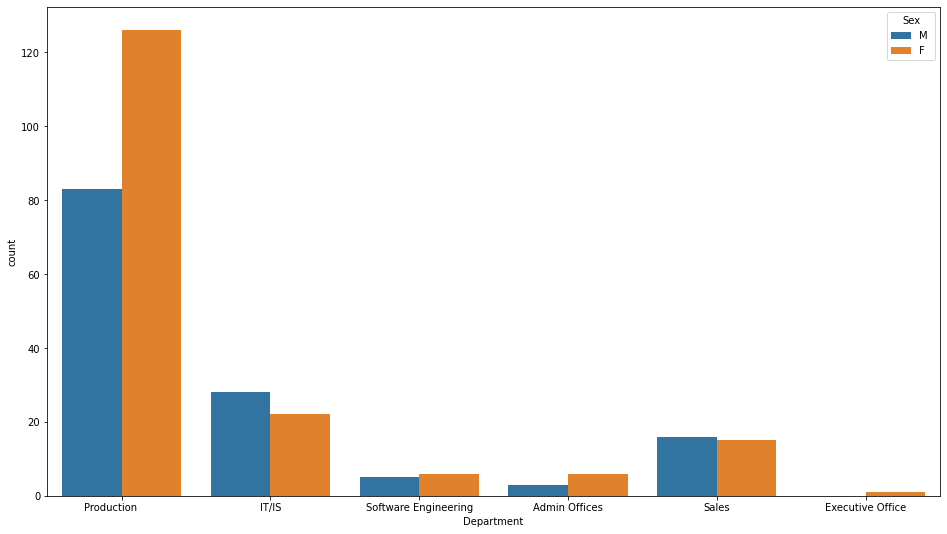

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,9))
ax=sns.countplot(x=data['Department'],hue=data['Sex'])

Pada grafik ditampilkan penyebaran gender pada semua departemen.
Kesimpulan yang dapat ditarik yaitu:
Tidak ada laki-laki di kantor eksekutif dan tidak ada perempuan di departemen software engineering.
Keragaman gender tidak dipertahankan di departemen produksi dan rekayasa perangkat lunak. (Jumlah perempuan hampir dua kali lipat jumlah laki-laki)



**Corellation Mapping**

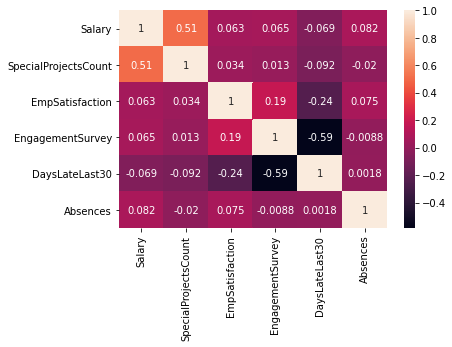

In [ ]:

dt = pd.DataFrame(data,columns=['Salary','SpecialProjectsCount','EmpSatisfaction','EngagementSurvey','DaysLateLast30','Absences'])

corrMatrix = dt.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

*0.00 - 0,199 = sangat rendah*

*0,20 - 0,3999 = rendah*

*0,40 - 0,5999 = sedang*

*0,60 - 0,799 = kuat*

*0,80 - 1,000 = sangat kuat*

Dilihat dari Corelation Mapping diatas dapat disimpulkan bahwa yang mempunyai:

Korelasi positif yaitu kolom "SpecialProjectsCount" dan "Salary".

Korelasi negatif yaitu kolom "EngagementSurvey" dan "DaysLateLast30"


**Melihat keterkaitan antara citizen dengan gaji karyawan**

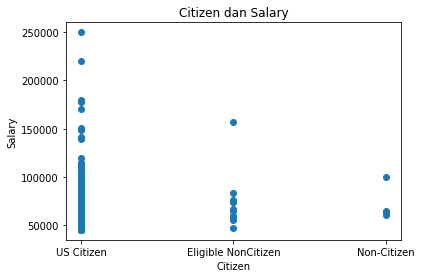

In [ ]:
#Plots in matplotlib reside within a figureobject, use plt.figure to create new figure
fig=plt.figure()

#Create one or more subplots usingadd_subplot, because you can'tcreate blank figure
ax = fig.add_subplot(1,1,1)

#Variable
ax.scatter(data['CitizenDesc'],data['Salary'])

#Labels and Tit
plt.title('Citizen dan Salary')
plt.xlabel('Citizen')
plt.ylabel('Salary')
plt.show()

Berdasarkan Scatterplot diatas menunjukkan bahwa karyawan dengan kewarganegaraan US(United States) Memiliki gaji yang cenderung tinggi.

**Menampilkan Top 10 Karyawan dengan Gaji Tertinggi**

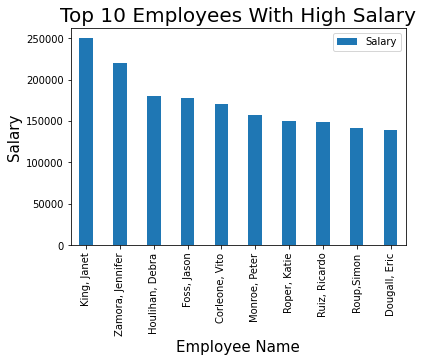

In [ ]:
data[["Employee_Name","Salary"]].nlargest(10,"Salary").plot.bar(x="Employee_Name",y="Salary",width=0.4,)#'vertical', 'horizontal',color=color
plt.title("Top 10 Employees With High Salary",fontsize=20)
plt.xlabel("Employee Name",fontsize=15)
plt.ylabel("Salary",fontsize=15)
plt.show()

Grafik diatas menunjukan 10 karyawan dengan gaji tertinggi



### **Pemodelan Data**



Pada tahap ini dibuat model regresi linier sederhana untuk memprediksi kinerja karyawan

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data[['EmpSatisfaction','Salary','SpecialProjectsCount','ManagerID']].isna().sum()

EmpSatisfaction         0
Salary                  0
SpecialProjectsCount    0
ManagerID               8
dtype: int64

Terdapat 8 nilai yang hilang di kolom ManagerID

In [ ]:
data[data['ManagerID'].isna()]

#the manager Webster Butler tidak memiliki ID yang ditetapkan kepadanya dala 8 instansi

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
19,"Becker, Scott",10277,0,0,1,3,5,3,0,53250,0,19,Production Technician I,MA,2452,04/06/79,M,Single,US Citizen,No,Asian,7/8/2013,NaN,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,4.20,4,0,1/11/2019,0,13
30,"Buccheri, Joseph",10184,0,0,1,1,5,3,0,65288,0,20,Production Technician II,MA,1013,07/28/83,M,Single,US Citizen,No,White,9/29/2014,NaN,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Google Search,Fully Meets,3.19,3,0,2/1/2019,0,9
44,"Chang, Donovan E",10154,0,0,1,1,5,3,0,60380,0,19,Production Technician I,MA,1845,08/24/83,M,Single,US Citizen,No,White,7/8/2013,NaN,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,3.80,5,0,1/14/2019,0,4
88,"Fancett, Nicole",10136,0,0,0,1,5,3,0,65902,0,20,Production Technician II,MA,2324,09/27/87,F,Single,US Citizen,No,Black or African American,2/17/2014,NaN,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,4.00,4,0,1/7/2019,0,7
135,"Hutter, Rosalie",10214,0,3,0,2,5,3,0,64995,0,20,Production Technician II,MA,2351,05/07/92,F,Separated,US Citizen,No,White,6/5/2015,NaN,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Indeed,Fully Meets,4.50,3,0,2/14/2019,0,6
177,"Manchester, Robyn",10077,1,1,0,2,5,3,0,62385,0,20,Production Technician II,MA,2324,08/25/76,F,Married,US Citizen,No,White,5/11/2016,NaN,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,5.00,3,0,1/21/2019,0,4
232,"Rivera, Haley",10011,1,1,0,1,5,4,0,46738,0,19,Production Technician I,MA,2171,01/12/73,F,Married,US Citizen,No,Asian,11/28/2011,NaN,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Google Search,Exceeds,4.36,5,0,2/11/2019,0,16
251,"Sewkumar, Nori",10071,0,0,0,3,5,3,0,50923,0,19,Production Technician I,MA,2191,03/10/75,F,Single,US Citizen,No,Asian,9/30/2013,NaN,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Google Search,Fully Meets,5.00,5,0,2/6/2019,0,14


Pada data diatas ditunjukkan terdapat 8 data karyawan yang pada kolom ID Manager tidak memiliki nilai

In [ ]:
data[data['ManagerName']=='Webster Butler'][['ManagerName','ManagerID']]

,ManagerName,ManagerID
4,Webster Butler,39.0
19,Webster Butler,NaN
30,Webster Butler,NaN
44,Webster Butler,NaN
65,Webster Butler,39.0
88,Webster Butler,NaN
89,Webster Butler,39.0
105,Webster Butler,39.0
124,Webster Butler,39.0
135,Webster Butler,NaN


*    Sepertinya 8 baris tanpa ManagerID telah dibiarkan kosong secara tidak sengaja yang bermanager Webster Butler
*    Webster Butler memiliki ID 39 yang telah ditetapkan

**Mengganti ID Manager karyawan yang memiliki manager Webster Butler yang masih tidak bernilai menjadi memiliki ID = 39**

In [ ]:
data['ManagerID'] = data['ManagerID'].replace(np.nan, 39.0)
data[data['ManagerName']=='Webster Butler'][['ManagerName','ManagerID']]

,ManagerName,ManagerID
4,Webster Butler,39.0
19,Webster Butler,39.0
30,Webster Butler,39.0
44,Webster Butler,39.0
65,Webster Butler,39.0
88,Webster Butler,39.0
89,Webster Butler,39.0
105,Webster Butler,39.0
124,Webster Butler,39.0
135,Webster Butler,39.0


Sekarang semua data telah memiliki ID Manager

In [ ]:
X = data[['EmpSatisfaction','Salary','SpecialProjectsCount','ManagerID']]
y = data['PerfScoreID']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#fitting data yang telah dikoreksi
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Sekarang semua data telah memiliki nilai

In [ ]:
predictions = lm.predict(X_test)

### **Evaluasi Model**

Pada tahap ini dilakukan evaluasi model dengan menghitung jumlah sisa kuadrat dan skor varians yang dijelaskan (R ^ 2).

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3092076768791097
MSE: 0.2347468097647208
RMSE: 0.4845067695757416


**Residuals**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


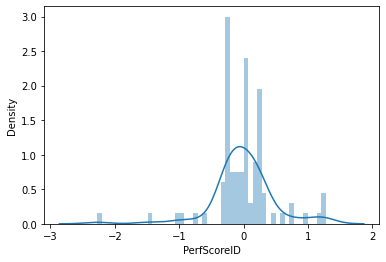

In [ ]:
sns.distplot((y_test-predictions),bins=50);

Pada diagram diatas ditampilkan data yang bersifat normal

In [ ]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
EmpSatisfaction,0.245674
Salary,0.000002
SpecialProjectsCount,-0.010926
ManagerID,-0.003805


* Peningkatan 1 unit dalam EmpSatisfaction dikaitkan dengan peningkatan perfomance score sebesar ~ 0,25 poin.
* Peningkatan 1 unit dalam PayRate tidak dikaitkan dengan peningkatan perfomance score.
* Peningkatan 1 unit di SpecialProjectsCount tidak terkait dengan peningkatan perfomance score.
* ManagerID, seperti yang diduga, tidak mempengaruhi perfomance score. Karena tidak masuk akal bahwa ManagerID akan menyebabkan peningkatan skor kinerja

> Kesimpulan :

Kepuasan karyawan adalah faktor terpenting dalam memprediksi kinerja karyawan, dan keduanya berkorelasi positif, meskipun sedikit. Perusahaan mungkin tertarik untuk meningkatkan kinerja karyawan melalui peningkatan kepuasan menggunakan strategi yang diteliti, mungkin untuk meningkatkan kepuasan mereka yang mendapat skor 3,0 atau kurang pada survei Kepuasan Karyawan.